In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
#Load the handwritten dataset
digits = load_digits()
data = digits.data
labels = digits.target

In [4]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
#Original Dim
original_dim = data.shape[1]
original_dim

64

In [8]:
#Perform TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

In [10]:
#Reduced Dim
reduced_dim = tsne_result.shape[1]
reduced_dim

2

C:\Users\ramsu\AppData\Local\Temp\ipykernel_10508\3022100674.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=label, cmap='viridis')


Original Dimensions: 64
Reduced Dimensions: 2
Silhouette Score: 0.1629432052257522
Daview Bouldin Score: 2.1517097380390964
Dimensionality Reduction: 96.875


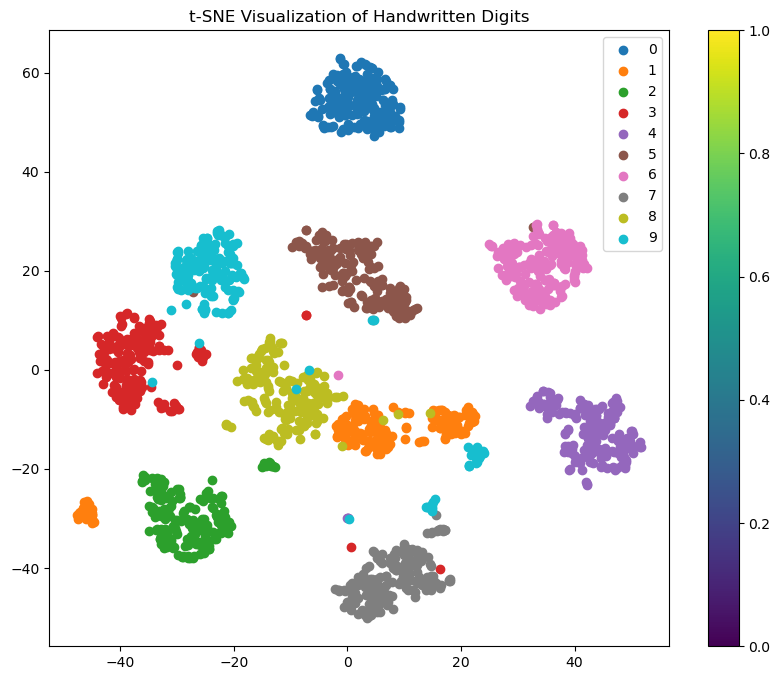

In [14]:
#Plot the tSNE visualization
plt.figure(figsize=(10,8))

#Loop through each class and plot separate
for label in set(labels):
    indices = labels == label
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=label, cmap='viridis')

plt.title('t-SNE Visualization of Handwritten Digits')
plt.legend()
plt.colorbar()

#Evaluation metrics
sil_score = silhouette_score(data, labels)
daview_score = davies_bouldin_score(data, labels)

#Calculate dimentionality reduction in %
reduction = ((original_dim - reduced_dim)/original_dim)*100

#Print Results
print(f"Original Dimensions: {original_dim}")
print(f"Reduced Dimensions: {reduced_dim}")
print(f"Silhouette Score: {sil_score}")
print(f"Daview Bouldin Score: {daview_score}")
print(f"Dimensionality Reduction: {reduction}")

plt.show()